<a href="https://colab.research.google.com/github/ElenaTassoni/esercitazioniIFTS2022/blob/main/Elena_Tassoni_Machine_Learning_28042022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. IMPORT

1.1 Importare le librerie necessarie

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pltù
import numpy as np

1.2 Caricare il dataset 'abalone_new.csv'. Il dataset riguarda delle conchiglie (le cosiddette 'orecchie di mare'). Lo scopo di questa analisi è quello di creare dei modelli capaci di predire il numero di anelli ('Rings') basandosi sulle altre features.

In [ ]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/abalone_new.csv

--2022-04-28 11:32:47--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/abalone_new.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.142.6
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.142.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211611 (207K) [text/csv]
Saving to: ‘abalone_new.csv.2’

abalone_new.csv.2   100%[===================>] 206.65K   712KB/s    in 0.3s    

2022-04-28 11:32:48 (712 KB/s) - ‘abalone_new.csv.2’ saved [211611/211611]



In [ ]:
#import dei dati
df = pd.read_csv('abalone_new.csv')
df

,Unnamed: 0,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


##2. TRAIN/TEST SPLIT

2.1 Eseguire un train/test split mischindo i dati e lasciando al test set il 25% dei record

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.25, shuffle=True, random_state=22)

##3. EDA

3.1 Performare una EDA comprensiva e che metta in luce le principali caratteristiche delle variabili, utilizzando le tecniche che abbiamo visto durante il corso: scatterplot, boxplot, matrice di correlazione e pairplot. Supportare i grafici con delle osservazioni scritte di spiegazione e descrizione.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3132 entries, 1897 to 2933
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3131 non-null   object 
 1   Length          3132 non-null   float64
 2   Diameter        3130 non-null   float64
 3   Height          3132 non-null   float64
 4   Whole weight    3132 non-null   float64
 5   Shucked weight  3132 non-null   float64
 6   Viscera weight  3115 non-null   float64
 7   Shell weight    3132 non-null   float64
 8   Rings           3132 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 244.7+ KB


C'è una sola variabile categorica binaria e 7 numeriche

In [ ]:
train_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3132.000000,3130.000000,3132.000000,3132.000000,3132.000000,3115.000000,3132.000000,3132.000000
mean,0.523201,0.407435,0.138942,0.824829,0.357345,0.179840,0.237662,9.905492
std,0.120546,0.099577,0.039350,0.489517,0.221339,0.109635,0.138364,3.226271
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440000,0.186000,0.092250,0.130000,8.000000
50%,0.540000,0.425000,0.140000,0.793750,0.332750,0.168500,0.230000,9.000000
75%,0.615000,0.480000,0.165000,1.148375,0.499625,0.252000,0.327750,11.000000
max,0.800000,0.630000,0.515000,2.657000,1.488000,0.641500,0.885000,29.000000


I dati sembrano sufficentemente omogenei quindi non è necessario standardizzare.

In [ ]:
train_df.isnull().sum()

Sex                1
Length             0
Diameter           2
Height             0
Whole weight       0
Shucked weight     0
Viscera weight    17
Shell weight       0
Rings              0
dtype: int64

Ci sono pochi valori nulli, solo nelle variabili Diameter, Viscera weight e Sex.

In [ ]:
#definisco features categoriche e numeriche

categorical_features = [col for col in train_df.columns if df[col].dtype==object]
numerical_features = [col for col in train_df.columns if df[col].dtype!=object]

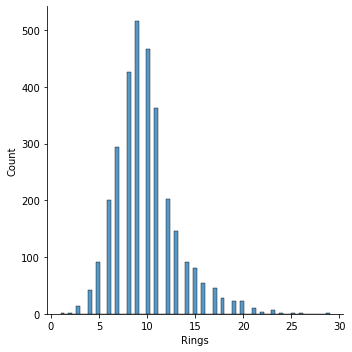

In [ ]:
#Grafico target

target_name = 'Rings'
sns.displot(train_df[target_name])

Il picco della distribuzione è tra 8 e 10. Mi aspetto una skewness e una kurtosis positive perché la distribuzione è asimmetrica con un maggior numero di valori a destra e la distirbuzione sembra più "appuntita" rispetto a una distribuzione normale.

In [ ]:
#Skewness & Kurtosis

print('Skewness: ', train_df[target_name].skew())
print('Kurtosis: ', train_df[target_name].kurt())

Skewness:  1.0770445854103725
Kurtosis:  2.1599543357158457


I valori confermano i dati del grafico.

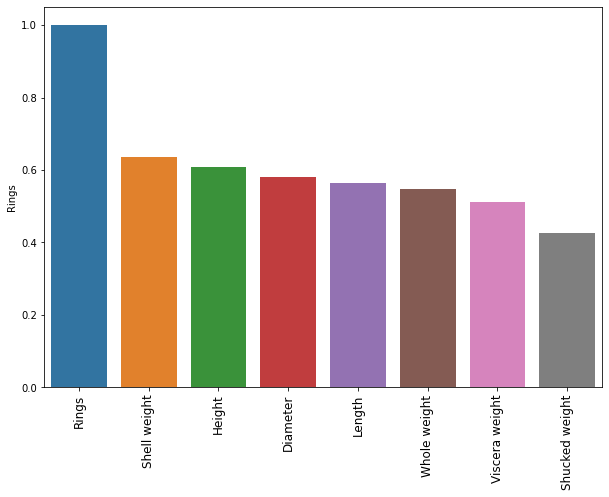

In [ ]:
#Grafico feature importances

corr_matrix = train_df.corr()
rings_corr = corr_matrix[target_name].abs().sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=rings_corr.index, y=rings_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

Le variabili maggiormmente correlate al target sono Shell weight, Height e Diameter.

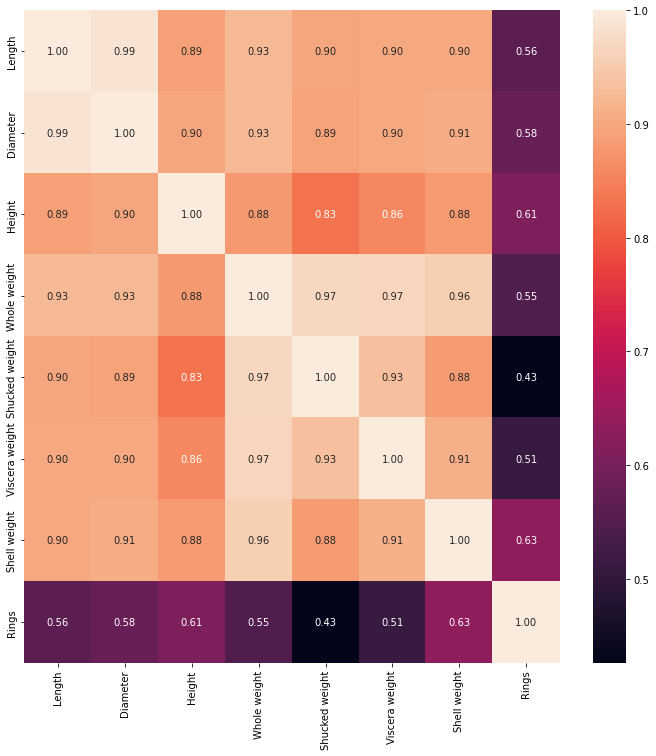

In [ ]:
#Correlazione di tutte le variabili

plt.figure(figsize=(12,12))
sns.heatmap(train_df.corr(), annot=True, fmt='.2f')
plt.show()

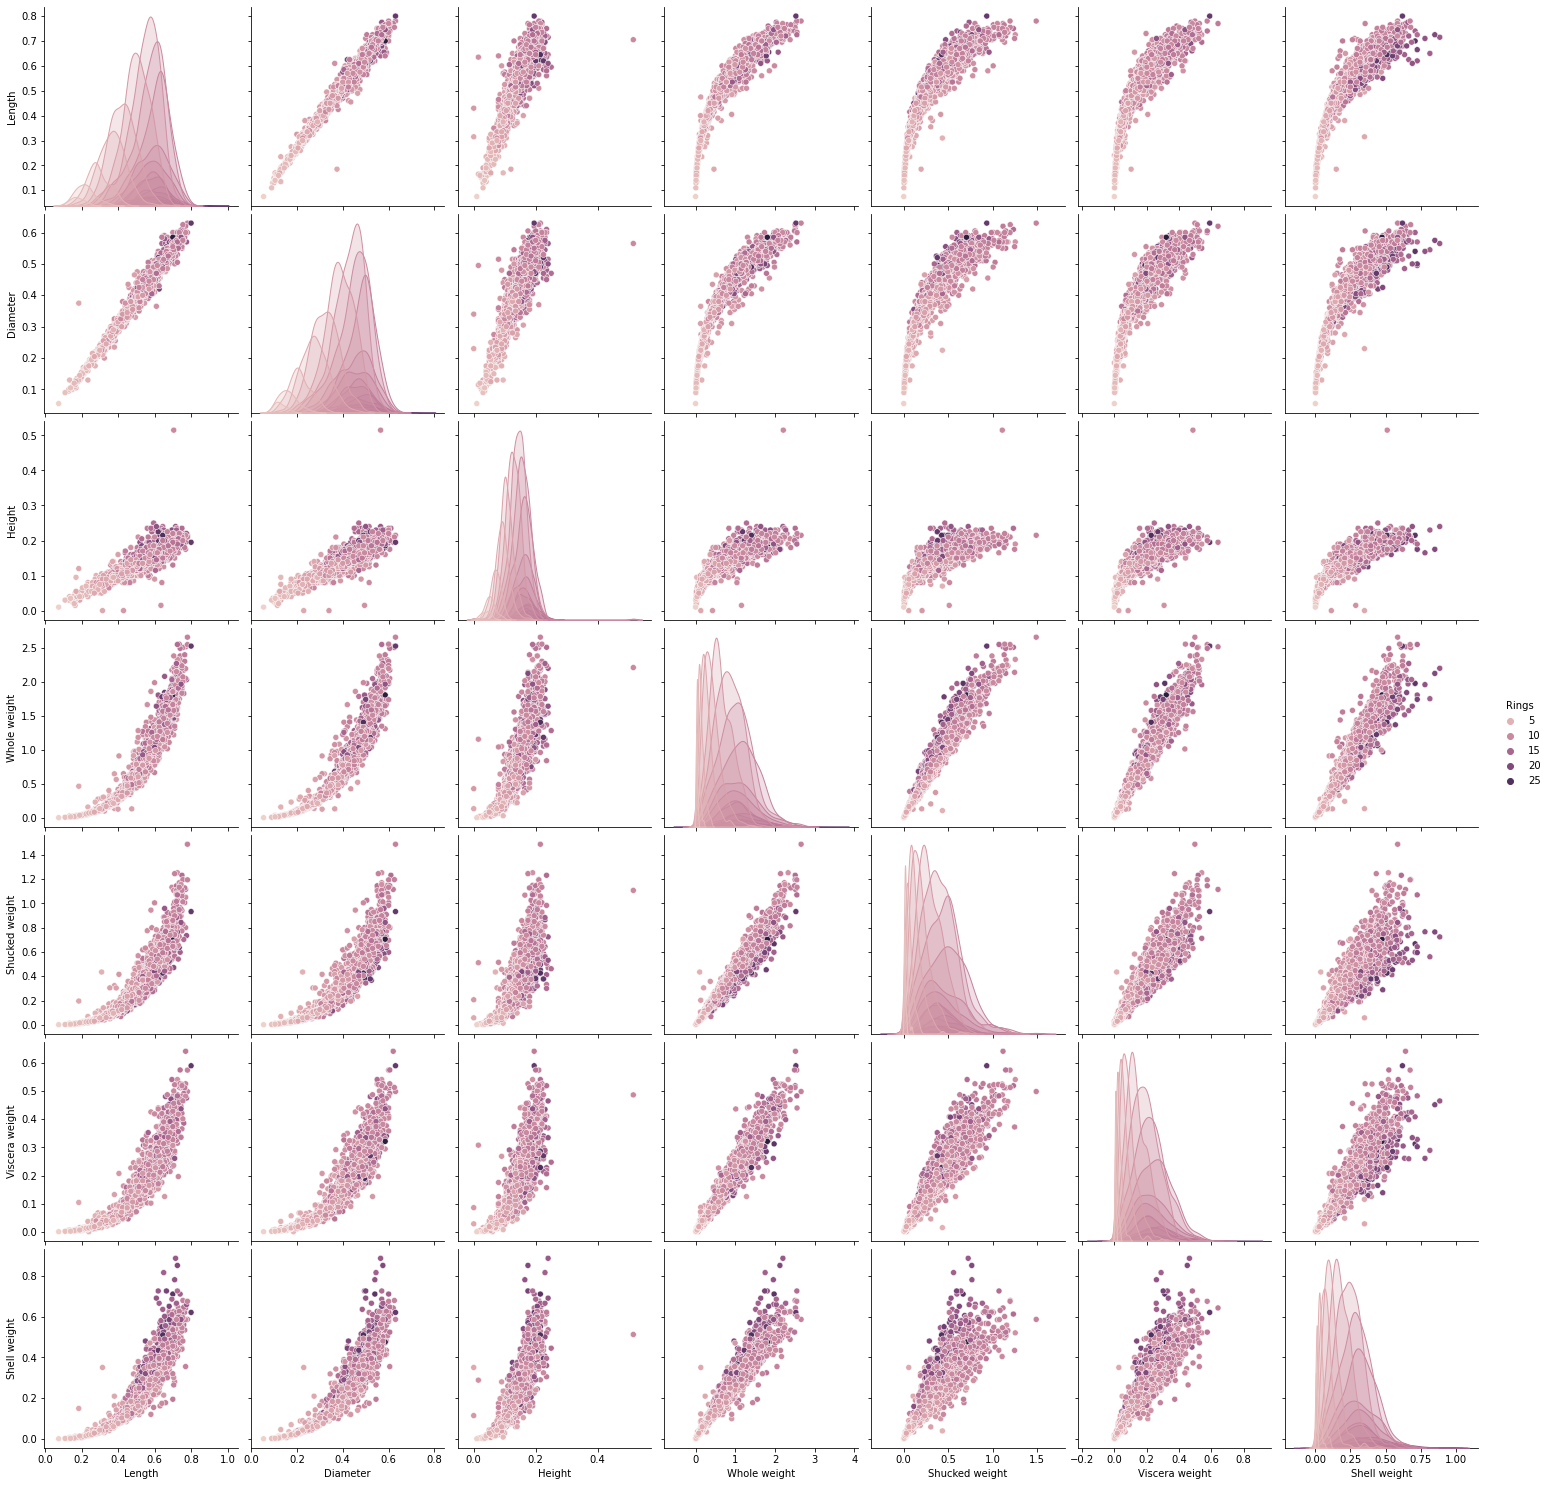

In [ ]:
sns.pairplot(train_df, height=3, aspect=1, hue= 'Rings')

I grafici pairplot e la matrice di correlazione totali confermano la correlazione maggiore con le variabili individuate dal barplot; in generale il target ha correlazioni con tutte le variabili numeriche.

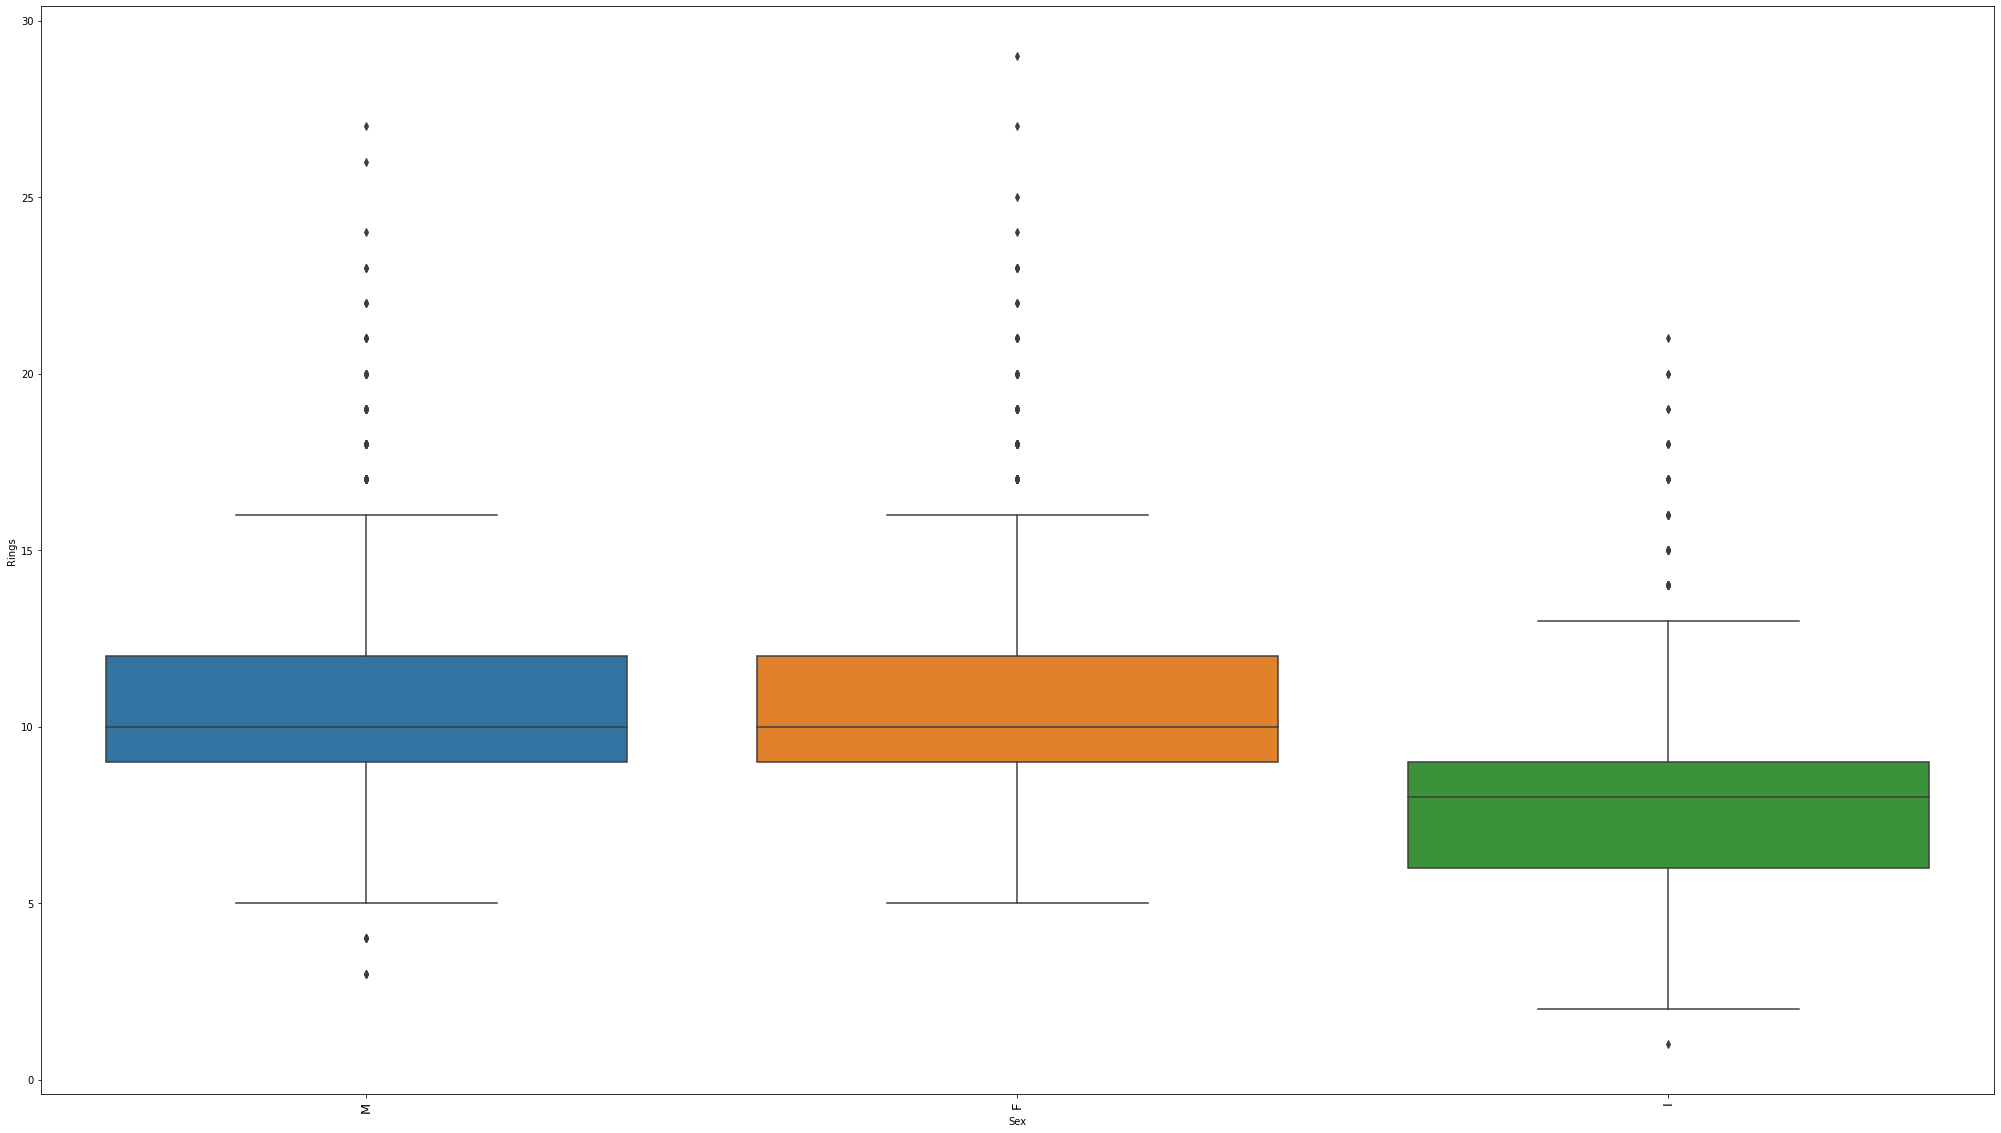

In [ ]:
#Box plot categorical features

for col in categorical_features:
    
    plt.figure(figsize=(35,20))
    sns.boxplot(x=col, y=target_name, data=df)
    plt.xticks(rotation=90, fontsize=13)
    plt.show()

La mediana è identica per i valori M e F, inferiore per I. La distribuzione è uguale.

##4. DOMANDE

Usare il subsetting sul dataset per tentare di rispondere alle seguenti domande (scrivere anche una riga di spiegazione per ognuna):

4.1 - Quale è la lunghezza media (Lenght) delle conchiglie di sesso maschile (M)?

In [ ]:
train_df.groupby('Sex').mean()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
F,0.579288,0.455362,0.157497,1.045375,0.445222,0.230301,0.301643,11.150451
I,0.427020,0.326309,0.107534,0.430491,0.190888,0.091885,0.127688,7.850000
M,0.561077,0.438900,0.151091,0.988627,0.431151,0.215472,0.281127,10.673250


La lunghezza media per Sex=M è 0.561077

4.2 Pesano mediamente di più le conchiglie di sesso maschile o femminile?

Mediamente le conchiglie di sesso femminile pesano di più: 1.045375 contro 0.988627 per le conchiglie maschili.

4.3 Le conchiglie più vecchie (cioè quelle con più 'Rings') hanno mediamente il diametro più grande di quelle più giovani?

In [ ]:
train_df.groupby('Rings').mean()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Rings,,,,,,,
1,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500
2,0.150000,0.100000,0.025000,0.015000,0.004500,0.004000,0.005000
3,0.173462,0.126154,0.042308,0.027462,0.011231,0.006385,0.008654
4,0.219048,0.160714,0.051905,0.057786,0.024048,0.012548,0.017774
5,0.287912,0.213132,0.070275,0.128445,0.059643,0.028478,0.037802
6,0.369104,0.279627,0.092736,0.273366,0.122828,0.058563,0.079515
7,0.424388,0.323225,0.106003,0.404308,0.187435,0.087333,0.112794
8,0.499204,0.385375,0.126393,0.640132,0.293009,0.138425,0.178806
9,0.547083,0.425709,0.142529,0.852141,0.386941,0.187989,0.237215


Sì, aumentando il numero di rings il diametro medio è maggiore.

##5. PRE-PROCESSING

5.1 Eseguire eventuali step di pre-processing del dataset, come per esempio la gestione di eventuali valori nulli, la trasformazioni di variabili categoriche e, se necessaria, la normalizzazione.

Per trasformare le variabili categoriche, avendo solo 3 valori possibili, li assegno manualmente.

In [ ]:
train_df.replace({"Sex":{'M':0, 'F':1, 'I':0.5}}, inplace=True)
train_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1897,0.0,0.570,0.415,0.130,0.8800,0.4275,0.1955,0.2380,13
2523,1.0,0.565,0.440,0.150,0.9830,0.4475,0.2355,0.2485,9
2290,0.5,0.325,0.270,0.100,0.1850,0.0800,0.0435,0.0650,6
3814,0.5,0.380,0.275,0.095,0.2425,0.1060,0.0485,0.2100,6
2468,1.0,0.370,0.275,0.080,0.2270,0.0930,0.0625,0.0700,8
...,...,...,...,...,...,...,...,...,...
989,0.0,0.575,0.475,0.160,1.1140,0.4955,0.2745,0.2900,9
2527,0.0,0.595,0.490,0.185,1.1850,0.4820,0.2015,0.3610,10
2952,1.0,0.645,0.485,0.150,1.1510,0.5935,0.2315,0.2930,12
356,0.0,0.675,0.525,0.185,1.5870,0.6935,0.3360,0.3950,13


Valori nulli (individuati nella EDA): li sostituisco con la media.

In [ ]:
train_df = train_df.fillna(train_df.mean())
train_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Divido il train set in X e y:

In [ ]:
X_train = train_df.drop(columns='Rings', axis=1).copy()
y_train = train_df['Rings'].copy()

La standardizzazione non è necessaria poiché i dati non variano tra ordini di grandezza diversi.

##6. REGRESSIONE LINEARE

6.1 Eseguire il fitting di una LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

modelR = LinearRegression()
modelR = modelR.fit(X=X_train, y=y_train)

6.2 Valutare le performance sul test set (se necessario, ricordate di riapplicare gli step del pre- processing anche al test-set) utilizzando r2, MAPE e plottando il grafico di 'perfect fit' (actual vs pred).

In [ ]:
#train_preds_R = modelR.predict(X_train)

Pre-processing del test set:

In [ ]:
#replace delle variabili categoriche

test_df.replace({"Sex":{'M':0, 'F':1, 'I':0.5}}, inplace=True)
test_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
629,0.0,0.340,0.265,0.085,0.1835,0.0770,0.0460,0.065,10
3862,0.0,0.475,0.370,0.125,0.6550,0.2660,0.1725,0.185,10
3368,0.5,0.610,0.480,0.165,1.0970,0.4215,0.2640,0.335,13
1224,0.5,0.345,0.255,0.095,0.1945,0.0925,0.0370,0.055,6
776,0.0,0.505,0.385,0.145,0.6775,0.2360,0.1790,0.200,15
...,...,...,...,...,...,...,...,...,...
757,1.0,0.605,0.495,0.190,1.4370,0.4690,0.2655,0.410,15
2959,1.0,0.660,0.525,0.160,1.2770,0.4975,0.3190,0.394,13
2898,0.5,0.550,0.435,0.165,0.8040,0.3400,0.1940,0.244,8
4015,0.0,0.635,0.480,0.145,1.1810,0.6650,0.2290,0.225,10


In [ ]:
#sostituzione valori nulli con la media

test_df = test_df.fillna(test_df.mean())
test_df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [ ]:
# divido il test set in X e y

X_test = test_df.drop(columns='Rings', axis=1).copy()
y_test = test_df['Rings'].copy()

Prediction sul test set

In [ ]:
test_preds_R = modelR.predict(X_test)

Evaluation su test set:

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, test_preds_R)
r2 = r2_score(y_test, test_preds_R)

print('Mape linear regression: ', mape)
print('R2 score linear regression: ', r2)

Mape linear regression:  0.16035830905169426
R2 score linear regression:  0.45763276361573035


Grafico con retta di perfect fit:

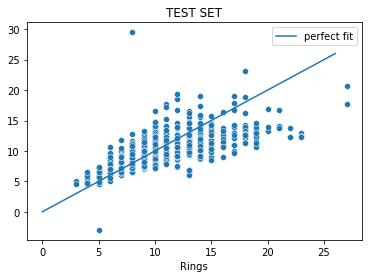

In [ ]:
#previsioni VS targets
sns.scatterplot(x=y_test, y=test_preds_R)

#retta di perfect fit
plt.plot(range(0,y_test.max()), range(0,y_test.max()), label='perfect fit')
plt.title('TEST SET')
plt.legend()
plt.show()

##7. RANDOM FOREST

7.1 Allenare un RandomForestRegressor performando una ottimizzazione sui suoi iper- parametri principali (utilizzare RandomizedSearchCV, e come cross validation usare un KFold diviso in 10)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

parameters = {
    'n_estimators':np.arange(1,10), 
    'max_depth':np.arange(1,10),
    'max_features':['auto', 'sqrt', 'log2']
    }


modelF = RandomizedSearchCV(RandomForestRegressor(), param_distributions=parameters, cv=KFold(n_splits=10), scoring='r2', refit=True)

In [ ]:
modelF = modelF.fit(X_test, y_test)

In [ ]:
modelF.best_estimator_

RandomForestRegressor(max_depth=6, n_estimators=9)

In [ ]:
modelF.best_score_

0.4583790042929379

7.2 Valutare le performance sul test set (se necessario, ricordate di riapplicare gli step del pre- processing anche al test-set) utilizzando r2, MAPE e plottando il grafico di 'perfect fit' (actual vs pred).

In [ ]:
test_preds_F = modelF.predict(X_test)

In [ ]:
#evaluation
mape = mean_absolute_percentage_error(y_test, test_preds_F)
r2 = r2_score(y_test, test_preds_F)

print('Mape Random Forest: ', mape)
print('R2 score Random Forest: ', r2)

Mape Random Forest:  0.11092381848908689
R2 score Random Forest:  0.7600408506330842


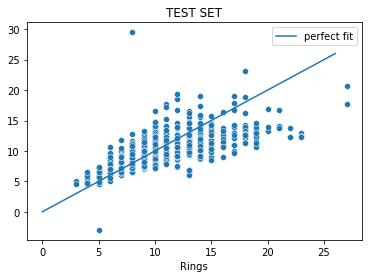

In [ ]:
#Grafico con retta di perfect fit

sns.scatterplot(x=y_test, y=test_preds_R)
plt.plot(range(0,y_test.max()), range(0,y_test.max()), label='perfect fit')
plt.title('TEST SET')
plt.legend()
plt.show()

##8. PIPELINE

8.1 Creare una pipeline che unisca tutto quanto fatto sul dataset, usando il RandomForest come regressore,
e fittarla ai dati.

In [ ]:
from sklearn.pipeline import Pipeline

classifier = RandomForestRegressor(random_state=22, n_estimators=9,max_depth=6)

pipe = Pipeline([
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('classifier',
                 RandomForestRegressor(max_depth=6, n_estimators=9,
                                       random_state=22))])

8.2 Salvare la pipeline utilizzando joblib

In [ ]:
import joblib

joblib.dump(pipe,'Elena-Tassoni-ML-test.pkl')
uploaded_model = joblib.load('Elena-Tassoni-ML-test.pkl')